In [1]:
import sys

sys.path.insert(0, '/mnt/data/molchanov/dltranz')

import torch
import torch.nn.functional as F
from torch.autograd import Function, Variable
import numpy as np
import random

import matplotlib.pyplot as plt

from domyshnik.models import *
from domyshnik.data import *
from domyshnik.constants import *
from domyshnik.utils import *
from domyshnik.losses import *

def draw(imgs):
        if isinstance(imgs, list):
            imgs = torch.stack(imgs)
        fig = plt.figure()
        rows, columns = 1, imgs.shape[0]
        for i in range(imgs.shape[0]):
            fig.add_subplot(rows, columns, i+1)
            if imgs[i].size(0) == 3:
                plt.imshow(imgs[i].transpose(0, 1).transpose(1, 2))
            else:
                plt.imshow(imgs[i])
        plt.show()
        
def draw_rgb(imgs):
    if isinstance(imgs, list):
        imgs = torch.stack(imgs)
    fig = plt.figure()
    rows, columns = 1, imgs.shape[0]
    for i in range(imgs.shape[0]):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(imgs[i].transpose(0, 1).transpose(1, 2))
    plt.show()
        
%matplotlib inline


model _params:
        CURRENT_PARAMS cifar10_metric_learning_global
        N_AUGMENTS 15
        LEARNING_RATE 0.002
        GAMMA 0.9025
        BATCH_SIZE 800
        EPOCHS 250
        SAMPLING_STRATEGY HardNegativePair
        NEGATIVES_COUNT 15
        MARGING 0.5
        STEP_SIZE 5
        MODEL_POSTFIX cifar10_global
        ADD_INFO {'k_pos_centroids': 1, 'k_neg_centroids': 10, 'centroids_count': 1000, 'use_clusterisation_loss': True, 'k_cluster': 70}
        ERROR_RATE 0.5
       


Files already downloaded and verified


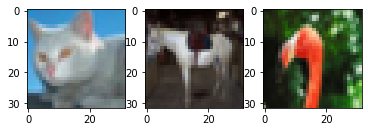

torch.Size([99, 3, 32, 32])


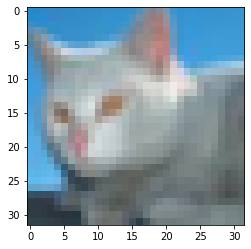

In [2]:
base_loader = get_cifar10_train_loader(1000, n_augments=-2, augment_labels=False)
centroids = get_cifar10_centroids(100, base_loader)    
draw_rgb(centroids[:3])
img = transforms.ToPILImage()(centroids[0])
plt.imshow(img)
print(centroids.size())

In [3]:
loader = get_cifar10_train_global_loader(128, centroids, 10)
sample = next(iter(loader))

Files already downloaded and verified


In [4]:
sample[0][0].size(), sample[1][0].size()

(torch.Size([128, 3, 32, 32]), torch.Size([990, 3, 32, 32]))

In [5]:
for (imgs, lbls), (centroids_, centroids_labels) in loader:
    print(imgs.size(), lbls.size(), centroids_.size(), centroids_labels.size())
    print(centroids_labels)
    break

torch.Size([128, 3, 32, 32]) torch.Size([128]) torch.Size([990, 3, 32, 32]) torch.Size([990])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19,
        19, 19, 20, 20, 20

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

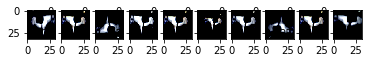

In [6]:
draw_rgb(sample[1][0][10:20])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


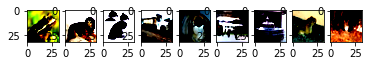

In [7]:
draw_rgb(sample[0][0][1:10])

In [8]:
print(centroids.size())
loader2 = get_cifar10_test_global_loader(128, centroids)
sample = next(iter(loader2))

torch.Size([99, 3, 32, 32])
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


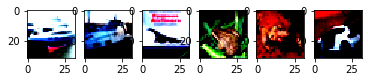

In [9]:
draw_rgb(sample[0][0][1:7])

In [10]:
for i, ((imgs, lbls), (centroids_, centroids_labels)) in enumerate(loader2):
    print(i, imgs.size(), lbls.size(), centroids_.size(), centroids_labels.size())
    print(centroids_labels)
    break

0 torch.Size([128, 3, 32, 32]) torch.Size([128]) torch.Size([99, 3, 32, 32]) torch.Size([99])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

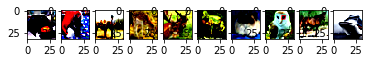

In [11]:
draw_rgb(sample[1][0][10:20])

In [12]:
d = ((1, 2), (3, 4))
((i, j), (k, l)) = d

In [13]:
i, j, k, l

(1, 2, 3, 4)

In [14]:
tuple([1, 2, 3])

(1, 2, 3)